In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import the data, set index column to date
df = pd.read_csv(
    'drive/MyDrive/fcc-forum-pageviews.csv',
    index_col=0,
    parse_dates=True
    )

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Clean the data - filter days where views were in the top 2.5% and bottom 2.5%

In [26]:
df = df[(df['value']>df['value'].quantile(0.025)) & (df['value']<df['value'].quantile(0.975))]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Draw a line plot

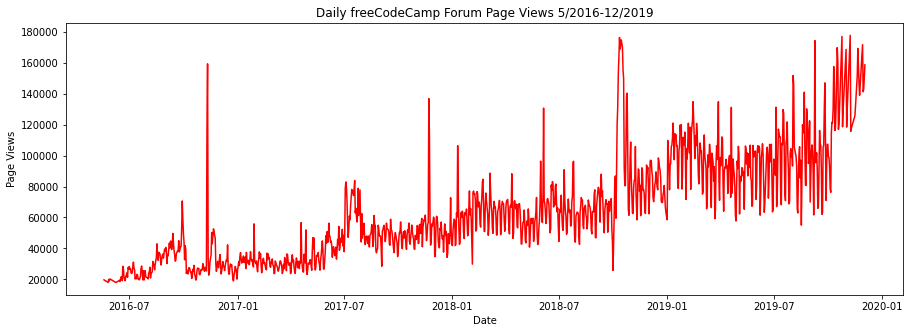

In [27]:
fig = plt.figure(figsize = (15,5))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.plot(df, color='red');

Copy and modify data for monthly bar plot

In [28]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month


df_bar = df.groupby([df.year, df.month], as_index=False).mean()
df_bar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [31]:
months = { 'month' : [1,2,3,4,5,6,7,8,9,10,11,12],
           'month_name' : ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']}
month_df = pd.DataFrame(months)
bar_df_merged = df_bar.merge(month_df, on='month')

bar_df_merged #used this merging method to get month name for practice, utilized strftime in next graph

,year,month,value,month_name
0,2016,5,19432.400000,May
1,2017,5,34244.290323,May
2,2018,5,56562.870968,May
3,2019,5,91439.903226,May
4,2016,6,21875.105263,June
5,2017,6,43577.500000,June
6,2018,6,70117.000000,June
7,2019,6,90435.642857,June
8,2016,7,24109.678571,July
9,2017,7,65806.838710,July


Draw bar plot

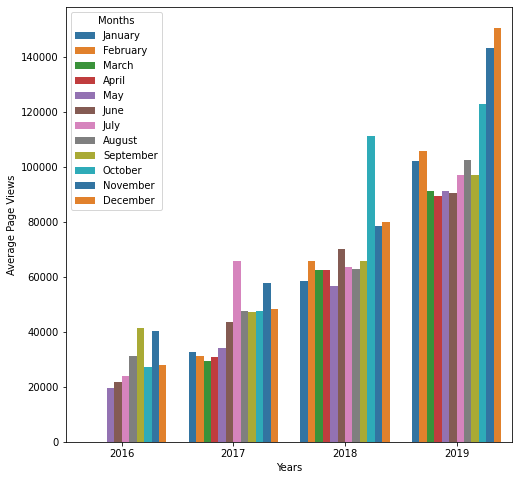

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x='year', y='value', hue='month_name',hue_order=month_df.month_name, data=bar_df_merged, palette='tab10')
plt.legend(title='Months', loc=2)
plt.xlabel('Years')
plt.ylabel('Average Page Views');

Draw box plots

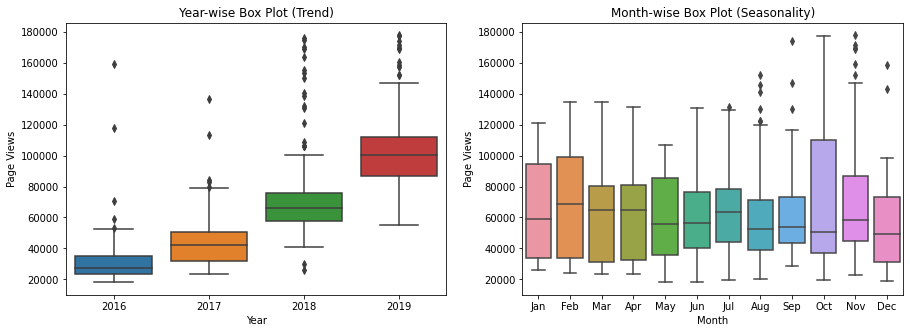

In [30]:
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].set_title('Year-wise Box Plot (Trend)')
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views');